# Proyecto CC5206

Mineria de datos sobre datasets del banco mundial. Eliminar ultimas filas del excel

# Importar librerias y dataset

In [1]:
# encoding=utf8  
import sys  
reload(sys)  
sys.setdefaultencoding('utf8')
import numpy as np
import pandas as pd
import pdb

d_2016 = pd.read_excel('dev_2010_proc.xlsx', keep_default_na=False, na_values='')

d_2016.head()

# Eliminar Outliers

In [2]:
#'''
outliers1 = [u'High income', u'High income: OECD', u'OECD members', u'World']
outliers2 = [u'East Asia & Pacific',u'East Asia & Pacific (excluding high income)',
             u'Euro area',u'Europe & Central Asia',u'European Union',u'Low & middle income',
             u'Middle income',u'North America',u'Upper middle income']

outliers3 = [u'Arab World', u'Sub-Saharan Africa',
             u'Sub-Saharan Africa (excluding high income)', u'Middle East & North Africa',
             u'Middle East & North Africa (excluding high income)', 
             u'Latin America & Caribbean',u'Latin America & Caribbean (excluding high income)',
             u'Least developed countries: UN classification', 
             u'Heavily indebted poor countries (HIPC)',u'High income',u'High income: nonOECD',
             u'High income: OECD', u'Euro area',u'Europe & Central Asia',
             u'Europe & Central Asia (excluding high income)',u'European Union',
             u'East Asia & Pacific',u'East Asia & Pacific (excluding high income)',
             u'Lower middle income',u'South Asia']

outliers4 = [u'IDA & IBRD total', u'IDA blend', u'IDA only', u'IDA total',
            u'East Asia & Pacific (IDA & IBRD countries)',u'Europe & Central Asia (IDA & IBRD countries)',
            u'Fragile and conflict affected situations',u'IBRD only',u'Late-demographic dividend',
            u'Latin America & the Caribbean (IDA & IBRD countries)',
            u'Middle East & North Africa (IDA & IBRD countries)',u'Not classified',
            u'Other small states',u'Post-demographic dividend',u'Pre-demographic dividend']


outliers5 = [u'Early-demographic dividend',u'Early-demographic dividend',u'Central Europe and the Baltics',
            u'South Asia (IDA & IBRD)',u'Sub-Saharan Africa (IDA & IBRD countries)',
            u'Sub-Saharan Africa (IDA & IBRD countries)', u'South Asia (IDA & IBRD)']

for out in outliers1:
    d_2016 = d_2016[d_2016['Country Name'] != out]
for out in outliers2:
    d_2016 = d_2016[d_2016['Country Name'] != out]
for out in outliers3:
    d_2016 = d_2016[d_2016['Country Name'] != out]
for out in outliers4:
    d_2016 = d_2016[d_2016['Country Name'] != out]
for out in outliers5:
    d_2016 = d_2016[d_2016['Country Name'] != out]
#paises = xdata['Country Name'].values.tolist()
paises = d_2016['Country Name'].values.tolist()
#xdata.head()

# Normalización

In [3]:
d_2016_n = d_2016
for k in range(2,len(d_2016.keys())):
    
    llave = d_2016.keys()[k]
    valores = d_2016[llave] 
    xvals = valores.tolist()
    #Normalización
    xmax = np.nanmax(valores)
    xmin = np.nanmin(valores)
    norm = xmax - xmin
    #pdb.set_trace()
    if (not np.isnan(xmax)) and norm!=0:
            d_2016_n[llave] = (d_2016[llave]-xmin)/norm
    

d_2016_n.head()

,Country Name,Country Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adjusted net national income (constant 2010 US$),Adjusted net national income (current US$),Adjusted net national income per capita (constant 2010 US$),Adjusted net national income per capita (current US$),...,"Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)",Urban land area (sq. km),Urban land area where elevation is below 5 meters (% of total land area),Urban land area where elevation is below 5 meters (sq. km),Urban population,Urban population (% of total),Urban population growth (annual %),Urban population living in areas where elevation is below 5 meters (% of total population)
0,Afghanistan,AFG,0.173014,0.398411,0.318663,0.811118,0.001112,0.001112,0.005043,0.005043,...,0.319229,0.290923,0.295624,NaN,NaN,NaN,1.076254e-02,0.171569,0.514782,NaN
1,Albania,ALB,0.609833,1.000000,1.000000,1.000000,0.000799,0.000799,0.049015,0.049015,...,0.321904,0.476545,0.429716,0.002106,0.013201,0.003546,2.270646e-03,0.473787,0.326641,0.046184
2,Algeria,DZA,0.999691,0.996968,0.981188,1.000000,0.010366,0.010366,0.050658,0.050658,...,0.527145,0.333039,0.369027,0.037648,0.000382,0.008373,3.700135e-02,0.642782,0.413226,0.011690
5,Angola,AGO,0.381356,0.318955,0.054945,0.761736,0.002007,0.002007,0.013742,0.013742,...,0.167661,0.187370,0.189113,0.001779,0.000191,0.002262,1.419336e-02,0.341059,0.599515,0.023161
6,Antigua and Barbuda,ATG,0.997937,0.936603,0.999524,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000332,0.253983,0.001044,7.304765e-07,0.188619,0.144766,0.167449


# Analisis Estadistico

In [4]:
varianzas = []
promedios = []
maximos = []
minimos = []
desv = []
for k in range(2,len(d_2016_n.keys())):
    
    llave = d_2016_n.keys()[k]
    valores = d_2016_n[llave] 
    count = 0
    
    #Normalización
    xmax = np.nanmax(valores)
    xmean = np.nanmean(valores)
    xmin = np.nanmin(valores)
    xstd = np.nanstd(valores)
    xvar = np.nanvar(valores)
    if np.isnan(xvar):
        print llave
    
    promedios.append(xmean)
    minimos.append(xmin)
    maximos.append(xmax)
    desv.append(xstd)
    varianzas.append(xvar)
    
sort = np.sort(varianzas)

most = -1   

print "Estadisticas con mayor varianza:"
#pdb.set_trace()
for i in range(10):
    value = sort[most]
    j = np.argwhere(varianzas == sort[most])+2
    features = d_2016_n.keys()
    print str(i+1)+' '+str(features[j])+' ('+str(sort[most]) +')'
    most-=1


# Graficos

## Histogramas

## Codo

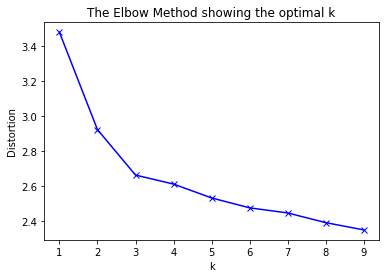

In [5]:
np_df = d_2016_n.as_matrix()
test = np_df[:,2:]
for row in range(test.shape[0]):
    for column in range(test.shape[1]):
        val = test[row][column]
        #print val
        if np.isnan(val):
            test[row][column]= promedios[column] 
        else:
            #test[row][column]= val/maximos[column] 
            pass

xdf = pd.DataFrame(test)

vectors = []
tot = test#.T
for i in range(len(tot[:,0])):
    vectors.append(tot[i])
    

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics
from scipy.spatial.distance import cdist

X = tot

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# TSNE

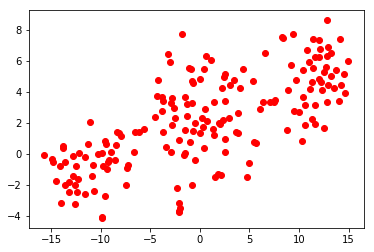

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X = vectors
X_embedded = TSNE(n_components=2,n_iter=100000000).fit_transform(X)
X_embedded.shape
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c="r", cmap=plt.cm.Spectral)
plt.show()

# PCA

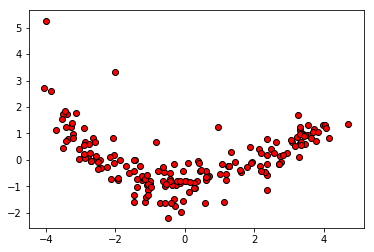

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

X = tot
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)


plt.scatter(X[:, 0], X[:, 1], c="r", cmap=plt.cm.spectral,
           edgecolor='k')


plt.show()

# clustering

In [21]:
from sklearn.cluster import KMeans
from sklearn import datasets

X = tot

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_

centroids = kmeans.cluster_centers_



# tSNE

In [22]:
r = []
r_l = []
g = []
g_l = []
b = [] 
b_l = []
y = []
y_l = []
c=[]
c_l=[]
m=[]
m_l=[]

r_embedded = TSNE(n_components=2,n_iter=100000000).fit_transform(X)
r_embedded.shape
for k in range(len(labels)):
    if labels[k]==0:
        r.append(X_embedded[k])
        r_l.append(paises[k])
    elif labels[k]==1:
        g.append(X_embedded[k])
        g_l.append(paises[k])
    elif labels[k]==2:
        b.append(X_embedded[k])
        b_l.append(paises[k])
    elif labels[k]==3:
        y.append(X_embedded[k])
        y_l.append(paises[k])
    elif labels[k]==4:
        c.append(X_embedded[k])
        c_l.append(paises[k])
    elif labels[k]==5:
        m.append(X_embedded[k])
        m_l.append(paises[k])
plt.scatter([item[0] for item in r], [item[1] for item in r], c="r", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in g], [item[1] for item in g], c="g", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in b], [item[1] for item in b], c="b", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in y], [item[1] for item in y], c="y", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in c], [item[1] for item in c], c="c", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in m], [item[1] for item in m], c="m", cmap=plt.cm.Spectral)
plt.show()

# PCA 

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets


X = tot
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

r = []
r_l = []
g = []
g_l = []
b = [] 
b_l = []
y = []
y_l = []
c = []
c_l = []

for k in range(len(labels)):
    if labels[k]==0:
        r.append(X[k])
        r_l.append(paises[k])
    elif labels[k]==1:
        g.append(X[k])
        g_l.append(paises[k])
    elif labels[k]==2:
        b.append(X[k])
        b_l.append(paises[k])
    elif labels[k]==3:
        y.append(X[k])
        y_l.append(paises[k])
    elif labels[k]==4:
        c.append(X[k])
        c_l.append(paises[k])
        
plt.scatter([item[0] for item in r], [item[1] for item in r], c="r", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in g], [item[1] for item in g], c="g", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in b], [item[1] for item in b], c="b", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in y], [item[1] for item in y], c="y", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in c], [item[1] for item in c], c="c", cmap=plt.cm.Spectral)
plt.show()

In [24]:
r_l

[u'Albania',
 u'Algeria',
 u'Antigua and Barbuda',
 u'Argentina',
 u'Armenia',
 u'Azerbaijan',
 u'Bahamas, The',
 u'Bahrain',
 u'Bangladesh',
 u'Belize',
 u'Bhutan',
 u'Bolivia',
 u'Botswana',
 u'Brazil',
 u'Brunei Darussalam',
 u'Cabo Verde',
 u'Caribbean small states',
 u'Chile',
 u'Colombia',
 u'Costa Rica',
 u'Dominican Republic',
 u'Ecuador',
 u'Egypt, Arab Rep.',
 u'El Salvador',
 u'Fiji',
 u'Grenada',
 u'Guatemala',
 u'Guyana',
 u'Honduras',
 u'India',
 u'Indonesia',
 u'Iran, Islamic Rep.',
 u'Iraq',
 u'Jamaica',
 u'Jordan',
 u'Kazakhstan',
 u'Kuwait',
 u'Kyrgyz Republic',
 u'Lebanon',
 u'Libya',
 u'Malaysia',
 u'Maldives',
 u'Mauritius',
 u'Mexico',
 u'Moldova',
 u'Mongolia',
 u'Morocco',
 u'Nicaragua',
 u'Oman',
 u'Pacific island small states',
 u'Panama',
 u'Paraguay',
 u'Peru',
 u'Philippines',
 u'Qatar',
 u'Samoa',
 u'Saudi Arabia',
 u'Seychelles',
 u'Small states',
 u'South Africa',
 u'Sri Lanka',
 u'St. Lucia',
 u'St. Vincent and the Grenadines',
 u'Suriname',
 u'Tajikist

In [25]:
g_l

[u'Afghanistan',
 u'Angola',
 u'Benin',
 u'Burkina Faso',
 u'Burundi',
 u'Cambodia',
 u'Cameroon',
 u'Central African Republic',
 u'Chad',
 u'Comoros',
 u'Congo, Dem. Rep.',
 u'Congo, Rep.',
 u"Cote d'Ivoire",
 u'Djibouti',
 u'Equatorial Guinea',
 u'Eritrea',
 u'Ethiopia',
 u'Gabon',
 u'Gambia, The',
 u'Ghana',
 u'Guinea',
 u'Guinea-Bissau',
 u'Haiti',
 u'Kenya',
 u'Kiribati',
 u'Lao PDR',
 u'Lesotho',
 u'Liberia',
 u'Low income',
 u'Madagascar',
 u'Malawi',
 u'Mali',
 u'Mauritania',
 u'Mozambique',
 u'Myanmar',
 u'Namibia',
 u'Nepal',
 u'Niger',
 u'Nigeria',
 u'Pakistan',
 u'Papua New Guinea',
 u'Rwanda',
 u'Sao Tome and Principe',
 u'Senegal',
 u'Sierra Leone',
 u'Solomon Islands',
 u'Sudan',
 u'Swaziland',
 u'Tanzania',
 u'Timor-Leste',
 u'Togo',
 u'Uganda',
 u'Yemen, Rep.',
 u'Zambia',
 u'Zimbabwe']

In [26]:
b_l

[u'Australia',
 u'Austria',
 u'Barbados',
 u'Belarus',
 u'Belgium',
 u'Bosnia and Herzegovina',
 u'Bulgaria',
 u'Canada',
 u'China',
 u'Croatia',
 u'Cyprus',
 u'Czech Republic',
 u'Denmark',
 u'Estonia',
 u'Finland',
 u'France',
 u'Georgia',
 u'Germany',
 u'Greece',
 u'Hong Kong SAR, China',
 u'Hungary',
 u'Iceland',
 u'Ireland',
 u'Israel',
 u'Italy',
 u'Japan',
 u'Korea, Rep.',
 u'Latvia',
 u'Lithuania',
 u'Luxembourg',
 u'Macedonia, FYR',
 u'Malta',
 u'Montenegro',
 u'Netherlands',
 u'New Zealand',
 u'Norway',
 u'Poland',
 u'Portugal',
 u'Romania',
 u'Russian Federation',
 u'Serbia',
 u'Singapore',
 u'Slovak Republic',
 u'Slovenia',
 u'Spain',
 u'Sweden',
 u'Switzerland',
 u'Ukraine',
 u'United Kingdom',
 u'United States',
 u'Uruguay']

In [27]:
y_l

[]

In [28]:
c_l

[]

In [29]:
m_l

[]

In [30]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
import itertools
import numpy as np

shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='110m',
                                        category='cultural', name=shapename)

# some nice "earthy" colors


ax = plt.axes(projection=ccrs.PlateCarree())
for country in shpreader.Reader(countries_shp).records():
    if any(country.attributes['NAME_LONG'] in x for x in r_l):
        color = 'r'
    elif any(country.attributes['NAME_LONG'] in x for x in g_l):
        color = 'g'
    elif any(country.attributes['NAME_LONG'] in x for x in b_l):
        color = 'b'
    elif any(country.attributes['NAME_LONG'] in x for x in y_l):
        color = 'y'
    ax.add_geometries(country.geometry, ccrs.PlateCarree(),
    facecolor=color,
    label=country.attributes['NAME_LONG'])

fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 240
fig_size[1] = 180
plt.rcParams["figure.figsize"] = fig_size
plt.show()
plt.savefig("k3_dev_2010